In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('src/data/K_6203_17_250X600_625_2m_res16_ACNR.txt')

In [3]:
image_per_spectrum = df.columns.size - 2
n_spectrum = df.values.shape[0]

df.columns = ['x', 'y'] + np.arange(image_per_spectrum).tolist()

image_per_spectrum, n_spectrum

(420, 3840)

In [45]:
df.head(n=70)

,x,y,0,1,2,3,4,5,6,7,...,410,411,412,413,414,415,416,417,418,419
0,-121.874995,296.874988,34.114796,34.260544,34.420254,34.596622,34.762371,34.956093,35.209816,35.429764,...,79.078125,79.304184,79.729836,80.437172,81.362267,82.131363,82.475433,82.624596,82.885231,82.897491
1,-115.624995,296.874988,30.379671,30.499733,30.638462,30.789793,30.928646,31.102055,31.336107,31.524895,...,79.712128,80.001343,80.447182,81.158424,82.089912,82.838417,83.138878,83.237045,83.512596,83.600342
2,-109.374996,296.874988,30.805031,30.850729,30.916157,30.993118,31.058950,31.159454,31.325645,31.457689,...,79.107368,79.356720,79.764931,80.423004,81.249176,81.871140,82.065331,82.067978,82.274803,82.325127
3,-103.124996,296.874988,33.256126,33.246464,33.259129,33.278778,33.283405,33.323193,33.429363,33.495453,...,78.185463,78.454071,78.884987,79.560410,80.411987,81.061401,81.296234,81.309204,81.486481,81.507935
4,-96.874996,296.874988,32.174774,32.188129,32.219311,32.254818,32.277050,32.320232,32.407505,32.471024,...,77.445900,77.761436,78.205322,78.840347,79.652542,80.339287,80.721138,80.887016,81.121216,81.199005
5,-90.624996,296.874988,29.824183,29.870577,29.935654,30.000965,30.060211,30.157501,30.307379,30.415787,...,76.894516,77.259232,77.732979,78.376419,79.198494,79.907074,80.270760,80.438812,80.764648,80.969460
6,-84.374997,296.874988,30.592455,30.621910,30.669756,30.716070,30.753824,30.825130,30.947134,31.016068,...,77.259377,77.592842,78.033501,78.631020,79.383972,80.044495,80.405792,80.591125,80.893829,81.062553
7,-78.124997,296.874988,41.258270,41.318542,41.396660,41.480438,41.551460,41.655178,41.823925,41.938904,...,77.806038,78.101181,78.519196,79.129829,79.859711,80.416626,80.621979,80.691650,80.946899,80.994560
8,-71.874997,296.874988,44.095882,44.137947,44.199104,44.265480,44.314739,44.395855,44.542213,44.638626,...,77.568153,77.839409,78.250633,78.856743,79.570168,80.117935,80.329361,80.399323,80.611671,80.606972
9,-65.624997,296.874988,31.841480,31.853703,31.885500,31.921925,31.952042,32.008064,32.107903,32.164623,...,77.205338,77.503159,77.938599,78.553658,79.324692,80.022736,80.452118,80.701202,80.959450,81.011276


In [17]:
width = len(set(df['x'].values))
height = len(set(df['y'].values))

x = {_x : ind for ind, _x in enumerate(df['x'].unique())}
y = {_y : ind for ind, _y in enumerate(df['y'].unique())}

width, height, n_spectrum

(40, 96, 3840)

In [18]:
df['x'].unique(), df['y'].unique()

(array([-121.87499516, -115.62499541, -109.37499565, -103.1249959 ,
         -96.87499615,  -90.6249964 ,  -84.37499665,  -78.1249969 ,
         -71.87499714,  -65.62499739,  -59.37499764,  -53.12499789,
         -46.87499814,  -40.62499839,  -34.37499863,  -28.12499888,
         -21.87499913,  -15.62499938,   -9.37499963,   -3.12499988,
           3.12499988,    9.37499963,   15.62499938,   21.87499913,
          28.12499888,   34.37499863,   40.62499839,   46.87499814,
          53.12499789,   59.37499764,   65.62499739,   71.87499714,
          78.1249969 ,   84.37499665,   90.6249964 ,   96.87499615,
         103.1249959 ,  109.37499565,  115.62499541,  121.87499516]),
 array([ 296.8749882 ,  290.62498845,  284.3749887 ,  278.12498895,
         271.8749892 ,  265.62498945,  259.37498969,  253.12498994,
         246.87499019,  240.62499044,  234.37499069,  228.12499094,
         221.87499118,  215.62499143,  209.37499168,  203.12499193,
         196.87499218,  190.62499243,  184.374

In [19]:
from multiprocessing import sharedctypes

X = np.random.random((n_spectrum, width, height))
result = np.ctypeslib.as_ctypes(np.zeros((n_spectrum, width, height)))
shared_array = sharedctypes.RawArray(result._type_, result)

In [46]:
def multi_run_wrapper(args):
    return read_images(*args)

def read_images(start, end):
    imgs = np.ctypeslib.as_array(shared_array)
    for n in range(start, end):
        for _x in range(len(df['x'].unique())):
            for _y in range(len(df['y'].unique())):
                imgs[n, _x, _y] = df.values[_y*len(df['x'].unique()) + _x,n+2]

In [47]:
from multiprocessing import Pool

with Pool(processes=4) as pool:
    pool.map(multi_run_wrapper, [(0, 3),(3, 6), (6, 9)])

In [48]:
result = np.ctypeslib.as_array(shared_array)

In [49]:
for ind in range(9):
    mean, var = np.mean(result[ind]), np.std(result[ind])
    result[ind] -= mean
    result[ind] /= var

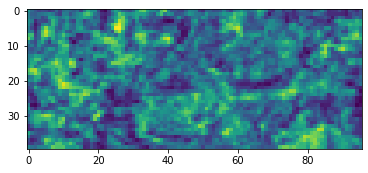

In [50]:
plt.imshow(result[0])

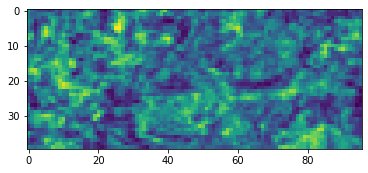

In [51]:
plt.imshow(result[4])

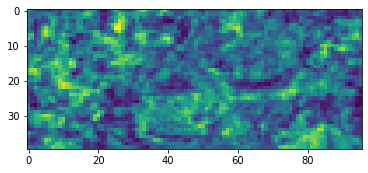

In [52]:
plt.imshow(result[7])